In [14]:
import numpy as np
import pandas as pd
from collections import Counter
import math
import matplotlib.pyplot as plt

In [15]:
data = pd.read_table("onlyhash.data",names=["user","date","hashtag"])
data.head()

,user,date,hashtag
0,webcom09,2008-11-11,#webcom08
1,kirsn,2008-11-11,#cassandra
2,mediahatch,2008-11-11,#pubcon
3,Give_Respect,2008-11-11,#107
4,Nathan_Safran,2008-11-11,#2


In [3]:
data.shape

(926507, 3)

In [4]:
data["hashtag_list"] = data.hashtag.apply(lambda x: x.split(" "))
# data = data.head(10)
data.head(5)

,user,date,hashtag,hashtag_list
0,webcom09,2008-11-11,#webcom08,[#webcom08]
1,kirsn,2008-11-11,#cassandra,[#cassandra]
2,mediahatch,2008-11-11,#pubcon,[#pubcon]
3,Give_Respect,2008-11-11,#107,[#107]
4,Nathan_Safran,2008-11-11,#2,[#2]


In [5]:
x = data[data["date"] == '2009-10-12']
print(len(x))
print(len(x.user.unique()))

17517
7637


In [6]:
data.hashtag_list.values

array([['#webcom08'], ['#cassandra'], ['#pubcon'], ..., ['#jobsearch'],
       ['#animation', '#toystory3', '#toystory'], ['#yshuttle']], dtype=object)

In [7]:
data.shape

(926507, 4)

In [8]:
data.user.value_counts().mean()

14.273937358455685

In [9]:
users = data.user.unique()
#print(len(users))
index = [i for i in range(1, len(users)+1)]

dates = data.date.unique()
index2 = [i for i in range(1, len(dates)+1)]

In [10]:
df = pd.DataFrame(users, index=index, columns=['user'])
df = df.head(1000)

In [11]:
data1 = data[data["user"] == "GetFreelanceJob"]
vals = data1["hashtag_list"].values
list_has = [val for sublist in vals for val in sublist]
list_has

['#hiring',
 '#voucher',
 '#google',
 '#pay',
 '#adwords',
 '#voucher_code',
 '#google',
 '#job',
 '#job',
 '#hiring',
 '#php',
 '#cake',
 '#app',
 '#convert',
 '#cake_php',
 '#php_app',
 '#convert_php',
 '#jobs',
 '#job',
 '#hiring',
 '#articles',
 '#article',
 '#site',
 '#created',
 '#cms',
 '#user',
 '#pending',
 '#jobs',
 '#hiring',
 '#net',
 '#developer',
 '#worked',
 '#cms',
 '#urgent',
 '#many_thanks',
 '#cms',
 '#job',
 '#hiring',
 '#video',
 '#channel',
 '#bandwidth',
 '#joomla',
 '#mods',
 '#fla',
 '#videos',
 '#bandwidth_usage',
 '#job',
 '#hiring',
 '#joomla',
 '#ie8',
 '#ie7',
 '#project',
 '#template',
 '#projects',
 '#added',
 '#custom_scrollbar',
 '#job',
 '#hiring',
 '#ups',
 '#sign_ups',
 '#indians',
 '#confirmation',
 '#ups',
 '#job',
 '#job',
 '#hiring',
 '#data',
 '#honest',
 '#worker',
 '#hard',
 '#project',
 '#anty',
 '#hard_worker',
 '#job',
 '#hiring',
 '#video',
 '#30sec',
 '#part',
 '#talking',
 '#advertisement',
 '#video_advertisement',
 '#source_file',
 '#j

In [12]:
def get_hash(user_name, dataframe):
    dataframe = dataframe[dataframe["user"] == user_name]
    hashtag_list = dataframe["hashtag_list"].values
    list_hash = [val for sublist in hashtag_list for val in sublist]
    return list_hash

In [13]:
df["hashtags"] = df.user.apply(lambda x: get_hash(x, data))

KeyboardInterrupt: 

In [ ]:
df.head()

In [ ]:
# df.hashtags.values[0]

In [ ]:
def entropy(counter_list):
#     log2 = lambda x: math.log(x,2)
    c = Counter(counter_list)
    ent = 0.0
    for k,v in c.items():
        p = float(v)/len(counter_list)
        ent = ent - p*math.log2(p)
    return ent

In [ ]:
df["user_entropy"] = df.hashtags.apply(lambda x: entropy(x))

In [ ]:
df.head()

In [ ]:
df.user_entropy.mean()

In [ ]:
# for bri 
# calc_sys_for_one_date(date):
#    return sys ent
# put it in an array 

In [ ]:
data["entropy"] = data.hashtag_list.apply(lambda x: entropy(x))

In [ ]:
data.head()

In [ ]:
grp = data.groupby(["date"]).entropy.mean()
user_entropy_by_day = grp.to_frame()
user_entropy_by_day.describe()

In [ ]:
df.head()

In [ ]:
df2 = pd.DataFrame(dates, index=index2, columns=['date'])

In [ ]:
df2.head()

In [ ]:
def get_hash_date(date, dataframe):
    dataframe = dataframe[dataframe["date"] == date]
    hashtag_list = dataframe["hashtag_list"].values
    list_hash = [val for sublist in hashtag_list for val in sublist]
    return list_hash

In [ ]:
df2["hashtags"] = df2.date.apply(lambda x: get_hash_date(x, data))

In [ ]:
df2.head()

In [ ]:
df2["sys_entropy"] = df2.hashtags.apply(lambda x: entropy(x))

In [ ]:
df2.describe()

In [ ]:
user_entropy_by_day.head()

In [ ]:
df2.head()

In [ ]:
user_entropy_by_day['date'] = user_entropy_by_day.index

In [ ]:
print(len(user_entropy_by_day))
print(len(df2))

In [ ]:
entropy_df = pd.merge(df2, user_entropy_by_day, on='date', how='outer')
len(entropy_df)

In [ ]:
entropy_df.head()

In [ ]:
ranked = entropy_df.sort_values(by="sys_entropy")
ranked.head()

In [ ]:
import matplotlib.pyplot as plt
length=len(ranked)
x = [x for x in range(0,length)]
plt.title("Sorted System Entropy and user Entropy (Average) per day")
plt.xticks(np.arange(0,max(x),40))
plt.yticks(range(0,int(max(ranked.sys_entropy)+2)))
plt.xlabel("Days Rank (based on System Entropy)")
plt.ylabel("Entropy")
plt.plot(x,ranked.entropy.values,label='User Entropy',color="r")
plt.plot(x,ranked.sys_entropy.values,label='System Entropy',color="b")
# plt.legend(loc=2)
plt.show()

## 2. Measuring inequality

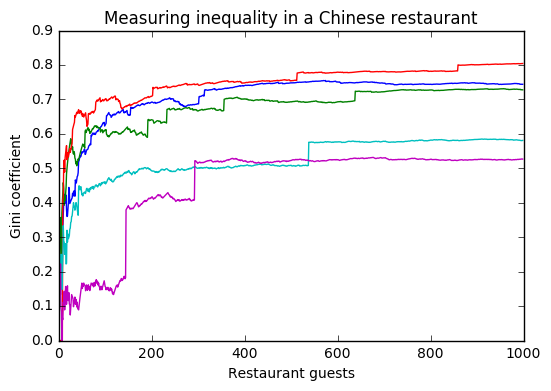

In [21]:
from chinese_restaurant import generateChineseRestaurant as chineseRes

customers = 1000
for i in range(0,5):
    tables, ginis = chineseRes(customers)
    plt.plot(ginis)
plt.ylabel("Gini coefficient")
plt.xlabel("Restaurant guests")
plt.title("Measuring inequality in a Chinese restaurant")
plt.show()

# 3. Herding

# Part 1 - First estimations

In [ ]:
estimations = pd.DataFrame({
        "fortress":[90,250,375],
        "fortress_args":["..","..",".."],
        "tower":[250,400,300],
        "tower_args":["..","..",".."]
    })

In [ ]:
print("mean: ",estimations.fortress.mean())
print("std: ",estimations.fortress.std())
print("var: ",estimations.fortress.std()**2)

In [ ]:
print("mean: ",estimations.tower.mean())
print("std: ",estimations.tower.std())
print("var: ",estimations.tower.std()**2)

# Part 2 - After discussion

In [16]:
estimations = pd.DataFrame({
        "fortress":[45,75,350],
        "tower":[250,200,450],
    })

In [17]:
print("mean: ",estimations.fortress.mean())
print("std: ",estimations.fortress.std())
print("var: ",estimations.fortress.std()**2)

In [18]:
print("mean: ",estimations.tower.mean())
print("std: ",estimations.tower.std())
print("var: ",estimations.tower.std()**2)

mean:  300.0
std:  132.28756555322954
var:  17500.000000000004
